In [1]:
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:

import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

/tmp/ipykernel_13298/2474063770.py:10: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import SVG, display


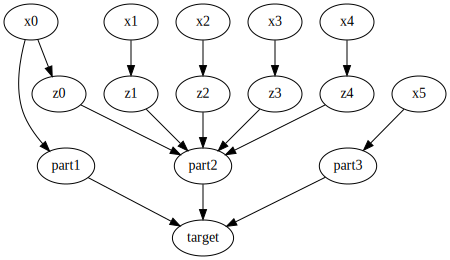

In [3]:
from typing import Mapping
import dataclasses

import botorch
import networkx as nx
import torch
import math
import sysgym.params.boxes as boxes
from sysgym.params import ParamsSpace
from IPython.core.display import SVG, display
from autorocks.envs.synthetic.funcs import levy

tkwargs = {
    "dtype": torch.double,
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
}



def draw(graph, path = None):
    svg = nx.nx_agraph.to_agraph(graph).draw(path = path, prog = "dot", format = "svg")
    display(SVG(svg))

levy_struct = levy.make_struct(6)
draw(levy_struct)




In [80]:
from autorocks.optimizer.bograph import bobn

bobn = bobn.BoBn(levy_struct,
                 params = LevySpace,
                 objectives = {'y'})

INFO:root:Creating a subgraph for the group: {'x14', 'z14'}
INFO:root:Creating a subgraph for the group: {'x4', 'z4'}
INFO:root:Creating a subgraph for the group: {'z16', 'x16'}
INFO:root:Creating a subgraph for the group: {'x23', 'z23'}
INFO:root:Creating a subgraph for the group: {'x3', 'z3'}
INFO:root:Creating a subgraph for the group: {'z6', 'x6'}
INFO:root:Creating a subgraph for the group: {'z18', 'x18'}
INFO:root:Creating a subgraph for the group: {'z5', 'x5'}
INFO:root:Creating a subgraph for the group: {'z22', 'x22'}
INFO:root:Creating a subgraph for the group: {'x12', 'z12'}
INFO:root:Creating a subgraph for the group: {'z21', 'x21'}
INFO:root:Creating a subgraph for the group: {'z0', 'x0', 'part1'}
INFO:root:Creating a subgraph for the group: {'z11', 'x11'}
INFO:root:Creating a subgraph for the group: {'z1', 'x1'}
INFO:root:Creating a subgraph for the group: {'z20', 'x20'}
INFO:root:Creating a subgraph for the group: {'x13', 'z13'}
INFO:root:Creating a subgraph for the group

In [82]:
levy_evaluate_structure(torch.tensor(LevySpace.sample()).T, 1)

{'part1': tensor([0.9857], dtype=torch.float64),
 'part2': tensor([389.5481], dtype=torch.float64),
 'part3': tensor([1.4846], dtype=torch.float64),
 'y': tensor([392.0184], dtype=torch.float64),
 'z0': tensor([11.2638], dtype=torch.float64),
 'z1': tensor([1.7187], dtype=torch.float64),
 'z2': tensor([2.9775], dtype=torch.float64),
 'z3': tensor([1.2009], dtype=torch.float64),
 'z4': tensor([16.3232], dtype=torch.float64),
 'z5': tensor([8.4264], dtype=torch.float64),
 'z6': tensor([11.7165], dtype=torch.float64),
 'z7': tensor([1.4170], dtype=torch.float64),
 'z8': tensor([5.7023], dtype=torch.float64),
 'z9': tensor([17.4748], dtype=torch.float64),
 'z10': tensor([9.4196], dtype=torch.float64),
 'z11': tensor([79.2273], dtype=torch.float64),
 'z12': tensor([4.6948], dtype=torch.float64),
 'z13': tensor([6.6316], dtype=torch.float64),
 'z14': tensor([8.9965], dtype=torch.float64),
 'z15': tensor([70.5646], dtype=torch.float64),
 'z16': tensor([54.1116], dtype=torch.float64),
 'z17': 

In [102]:
import sysgym
test = sysgym.EnvParamsDict(LevySpace)

test['x0'] = 1

test['x4'] = 4
test_ = test.as_numpy().astype(int)
import numpy as np
np.nan(test_, -1)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'